# reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

+ KMeans
+ SVM
+ 5 full connected layer
+ 5 CNN (pytorch is needed)

In [ ]:

# Load Data #
import pandas as pd
import numpy as np

# training and validating data
beijin_file = '../data/Beijing_labeled.csv'
beijin_df = pd.read_csv(beijin_file)

Shenyang_df = '../data/Shenyang_labeled.csv'
Shenyang_df = pd.read_csv(Shenyang_df)

# evaluating data 
Guangzhou_file = '../data/Guangzhou_labeled.csv'
Guangzhou_df = pd.read_csv(Guangzhou_file)

Shanghai_file = '../data/Shanghai_labeled.csv'
Shanghai_df = pd.read_csv(Shanghai_file)


# combine training and validating data
training_data = pd.concat([beijin_df, Shenyang_df], ignore_index=True)
training_data = training_data.drop(columns=['PM_HIGH'])
training_labels = pd.concat([beijin_df, Shenyang_df], ignore_index=True)
training_labels = training_labels['PM_HIGH']

# split training and validating data
from sklearn.model_selection import train_test_split
training_data, validating_data, \
training_labels, validating_labels = train_test_split(\
    training_data, training_labels, test_size=0.2, random_state=42)

# evaluate data
evaluating_data_1 = Guangzhou_df.drop(columns=['PM_HIGH'])
evaluating_labels_1 = Guangzhou_df['PM_HIGH']

evaluating_data_2 = Shanghai_df.drop(columns=['PM_HIGH'])
evaluating_labels_2 = Shanghai_df['PM_HIGH']


Beijing:
	 PM_HIGH
0.0    0.686625
1.0    0.313375
Name: proportion, dtype: float64
Shenyang:
	 PM_HIGH
0.0    0.821602
1.0    0.178398
Name: proportion, dtype: float64
Guangzhou:
	 PM_HIGH
0.0    0.936391
1.0    0.063609
Name: proportion, dtype: float64
Shanghai:
	 PM_HIGH
0.0    0.901554
1.0    0.098446
Name: proportion, dtype: float64


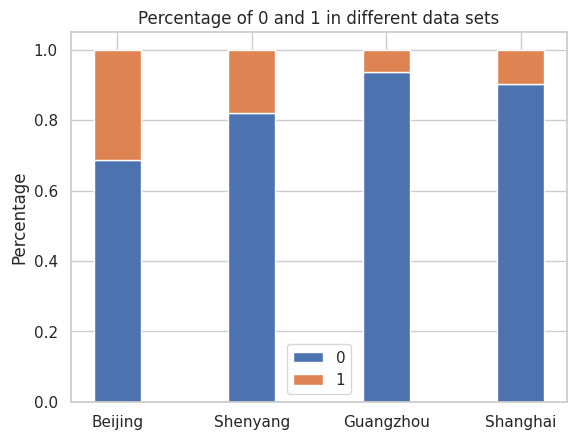

In [51]:
# Analyse data set #
# caluclate the percentage of 0 and 1 in training_labels
print("Beijing:\n\t",beijin_df['PM_HIGH'] .value_counts(normalize=True))
print("Shenyang:\n\t",Shenyang_df['PM_HIGH'] .value_counts(normalize=True))
print("Guangzhou:\n\t",Guangzhou_df['PM_HIGH'] .value_counts(normalize=True))
print("Shanghai:\n\t",Shanghai_df['PM_HIGH'] .value_counts(normalize=True))

# bar chart, the percentage of 0 and 1 in different data sets
import matplotlib.pyplot as plt
# Prepare the data
labels = ['Beijing', 'Shenyang', 'Guangzhou', 'Shanghai']
zeros = [beijin_df['PM_HIGH'].value_counts(normalize=True)[0], 
        Shenyang_df['PM_HIGH'].value_counts(normalize=True)[0], 
        Guangzhou_df['PM_HIGH'].value_counts(normalize=True)[0], 
        Shanghai_df['PM_HIGH'].value_counts(normalize=True)[0]]
ones = [beijin_df['PM_HIGH'].value_counts(normalize=True)[1],
        Shenyang_df['PM_HIGH'].value_counts(normalize=True)[1],
        Guangzhou_df['PM_HIGH'].value_counts(normalize=True)[1],
        Shanghai_df['PM_HIGH'].value_counts(normalize=True)[1]] 

x = range(len(labels))  
fig, ax = plt.subplots()
rects1 = ax.bar(x, zeros, width=0.35, label='0')
rects2 = ax.bar(x, ones, width=0.35, bottom=zeros, label='1')

ax.set_ylabel('Percentage')
ax.set_title('Percentage of 0 and 1 in different data sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [52]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class KMeansClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.cluster_labels = None

    def fit(self, X, y):
        # to train the model, 
        # we need to know the number of clusters, 
        # so we use KMeans to find the clusters
        self.kmeans = KMeans(n_clusters=self.n_clusters, n_init='auto', random_state=42)
        cluster_assignments = self.kmeans .fit_predict(X)
        # then we need to assign a label to each cluster
        self.cluster_labels = self._assign_cluster_labels(cluster_assignments, y)

    def predict(self, X):
        # to predict the labels,
        cluster_assignments = self.kmeans.predict(X)
        # we use the labels we assigned to the clusters
        predicted_labels = np.array([self.cluster_labels[cluster] for cluster in cluster_assignments])
        # and return the predicted labels
        return predicted_labels

    def score(self, X, y):
        # to evaluate the model,
        predicted_labels = self.predict(X)
        # we use accuracy
        return accuracy_score(y, predicted_labels)

    def _assign_cluster_labels(self, cluster_assignments, labels):
        # to assign a label to each cluster,
        unique_clusters = np.unique(cluster_assignments)
        cluster_labels = {}

        for cluster in unique_clusters:
            # we use the majority label of the examples in the cluster
            cluster_indices = np.where(cluster_assignments == cluster)[0]  # Use [0] to get a flat list
            majority_label = np.argmax(np.bincount(labels.iloc[cluster_indices]))
            cluster_labels[cluster] = majority_label
        return cluster_labels

2,0.728411,0.711572, 0.936391,0.901554
3,0.728411,0.711572, 0.936391,0.901554
4,0.728411,0.711572, 0.936391,0.901554
5,0.735320,0.740933, 0.371302,0.618061
6,0.739206,0.742660, 0.442308,0.646928
7,0.737910,0.740933, 0.442308,0.646928
8,0.732729,0.737478, 0.383136,0.629164
9,0.762090,0.746114, 0.911982,0.826795
10,0.747841,0.742660, 0.876479,0.759437
11,0.751727,0.737478, 0.889053,0.781643
12,0.754750,0.735751, 0.907544,0.794226
13,0.753022,0.737478, 0.911243,0.810511
14,0.754750,0.735751, 0.907544,0.807550
15,0.757340,0.730570, 0.921598,0.840118
16,0.758204,0.739206, 0.920858,0.840859
17,0.757772,0.734024, 0.921598,0.840118
18,0.759499,0.734024, 0.919379,0.839378
19,0.760363,0.739206, 0.920858,0.840859
20,0.761658,0.749568, 0.916420,0.851962
21,0.762953,0.740933, 0.918639,0.845300
22,0.761658,0.742660, 0.916420,0.849741
23,0.762953,0.744387, 0.912722,0.772021
24,0.762953,0.746114, 0.914941,0.761658
25,0.763385,0.746114, 0.914201,0.761658
26,0.764249,0.749568, 0.914941,0.781643
27,0.765

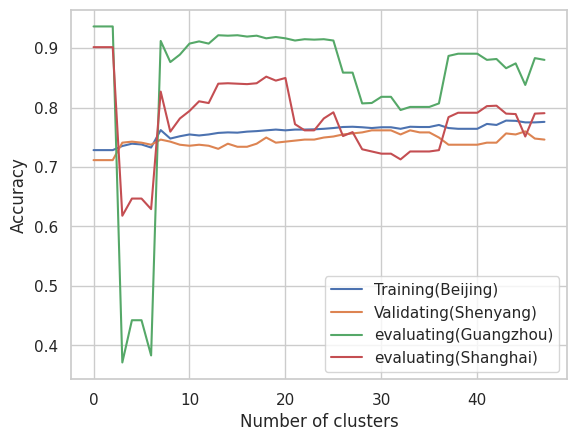

In [57]:
# plot different clusters to see the result

import matplotlib.pyplot as plt

training_acc_list = []
validating_acc_list = []
evaluating_acc_guangzhou_list = []
evaluating_acc_shanghai_list = []

for i in range(2,50):
  classifier = KMeansClassifier(i)
  classifier.fit(training_data, training_labels)

  training_acc = classifier.score(training_data, training_labels)
  training_acc_list.append(training_acc)
  # print(f"Training accuracy(Beijing): {training_acc:.6f}")

  validating_acc = classifier.score(validating_data, validating_labels)
  validating_acc_list.append(validating_acc)
  # print(f"Validating accuracy(Shenyang): {validating_acc:.6f}")

  evaluating_acc_guangzhou = classifier.score(evaluating_data_1, evaluating_labels_1)
  evaluating_acc_guangzhou_list.append(evaluating_acc_guangzhou)
  # print(f"evaluating accuracy(Guangzhou): {evaluating_acc_guangzhou:.6f}")

  evaluating_acc_shanghai = classifier.score(evaluating_data_2, evaluating_labels_2)
  evaluating_acc_shanghai_list.append(evaluating_acc_shanghai)
  # print(f"evaluating accuracy(Shanghai): {evaluating_acc_shanghai:.6f}")
  
  # print all acc in a line
  print(f"{i},{training_acc:.6f},{validating_acc:.6f},",
        f"{evaluating_acc_guangzhou:.6f},{evaluating_acc_shanghai:.6f}")

# plot the result
plt.plot(training_acc_list, label='Training acc')
plt.plot(validating_acc_list, label='Validating acc')
plt.plot(evaluating_acc_guangzhou_list, label='evaluating acc (Guangzhou)')
plt.plot(evaluating_acc_shanghai_list, label='evaluating acc (Shanghai)')
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
# try NN module to see if the accuracy can be improved
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

class VCliassfier():
  def __init__(self, pipeline):
    self.pipeline = pipeline

  def fit(self, X, y):
     # train the model
    self.pipeline.fit(X, y)

  def predict(self, X):
    # predict the labels
    return self.pipeline.predict(X)
  
  def score(self, X, y):
    # evaluate the model
    return self.pipeline.score(X, y)
  
def score(nn):
  # evaluate the model
  training_acc = nn.score(training_data, training_labels)
  print(f"Training accuracy: {training_acc:.6f}")

  validating_acc = nn.score(validating_data, validating_labels)
  print(f"Validating accuracy: {validating_acc:.6f}")

  evaluating_acc_guangzhou = nn.score(evaluating_data_1, evaluating_labels_1)
  print(f"evaluating accuracy(Guangzhou): {evaluating_acc_guangzhou:.6f}")

  evaluating_acc_shanghai = nn.score(evaluating_data_2, evaluating_labels_2)
  print(f"evaluating accuracy(Shanghai): {evaluating_acc_shanghai:.6f}")

In [75]:
# 5 layers
# create a pipeline
pipeline = make_pipeline(
  StandardScaler(), 
  MLPClassifier(hidden_layer_sizes=(64, 128, 32, 8, 1), max_iter=5000, random_state=42))

myfn = VCliassfier(pipeline)

myfn.fit(training_data, training_labels)

score(myfn)

Training accuracy: 0.903713
Validating accuracy: 0.765112
evaluating accuracy(Guangzhou): 0.743343
evaluating accuracy(Shanghai): 0.729090


In [79]:
# SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# create a pipeline
pipeline = make_pipeline(
  StandardScaler(), 
  SVC(kernel='rbf', random_state=42))

mysvm = VCliassfier(pipeline)
mysvm.fit(training_data, training_labels)
score(mysvm)



Training accuracy: 0.805699
Validating accuracy: 0.789292
evaluating accuracy(Guangzhou): 0.780325
evaluating accuracy(Shanghai): 0.743893


In [81]:
# pytorch
# 2 convetional layers, 3 fully connected layers, relu and sigmoid
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(1, 6, 5)
        self.pool = nn.MaxPool1d(2, 2)
        self.conv2 = nn.Conv1d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x
    
def train(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

def test(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            running_loss += loss.item()
            predicted = torch.round(outputs)
            total += labels.size(0)
            correct += (predicted == labels.unsqueeze(1)).sum().item()
    return running_loss / len(test_loader), correct / total

def score(model, train_loader, test_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        train_loss = train(model, train_loader, optimizer, criterion)
        test_loss, test_acc = test(model, test_loader, criterion)
        print(f'Epoch {epoch+1}/{epochs}', 
              f'Train Loss: {train_loss:.4f}', 
              f'Test Loss: {test_loss:.4f}', 
              f'Test Acc: {test_acc:.4f}')

def get_loader(X, y, batch_size=32):
    X = torch.tensor(X.values).float()
    y = torch.tensor(y.values).float()
    dataset = TensorDataset(X, y)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

model = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_loader = get_loader(training_data, training_labels)
test_loader = get_loader(validating_data, validating_labels)
score(model, train_loader, test_loader, criterion, optimizer, epochs=10)


ModuleNotFoundError: No module named 'torch'